In [2]:
## x,y값샘플제작

손든횟수=[1,2,3,1,1,3,1,3]
성적=[90,100,80,100,88,77,55,85]

import pandas as pd
df=pd.DataFrame(dict({'손든횟수':손든횟수, '성적':성적}))
df

,손든횟수,성적
0,1,90
1,2,100
2,3,80
3,1,100
4,1,88
5,3,77
6,1,55
7,3,85


### Part1. [단순선형회귀-최소제곱법계산식]
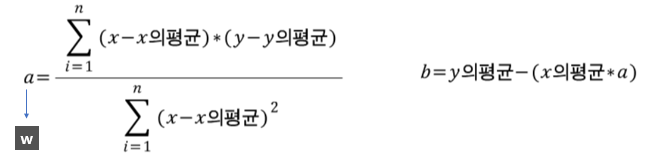

In [3]:
x=df['손든횟수'].values
y=df['성적'].values
x,y

(array([1, 2, 3, 1, 1, 3, 1, 3], dtype=int64),
 array([ 90, 100,  80, 100,  88,  77,  55,  85], dtype=int64))

In [4]:
xData=np.reshape(x,(-1,1))
xData

array([[1],
       [2],
       [3],
       [1],
       [1],
       [3],
       [1],
       [3]], dtype=int64)

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(xData,y)
model.coef_, model.intercept_


(array([-0.96363636]), 86.18181818181819)

### -- [작업1] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
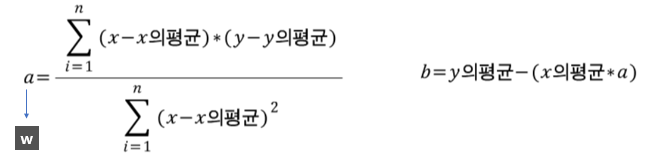

In [6]:
coef=np.sum((x-np.mean(x))*(y-np.mean(y))) / (np.sum((x-np.mean(x))**2))
coef

-0.9636363636363636

In [7]:
np.mean(y)-(np.mean(x)*coef)

86.18181818181819

### -- [작업2] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
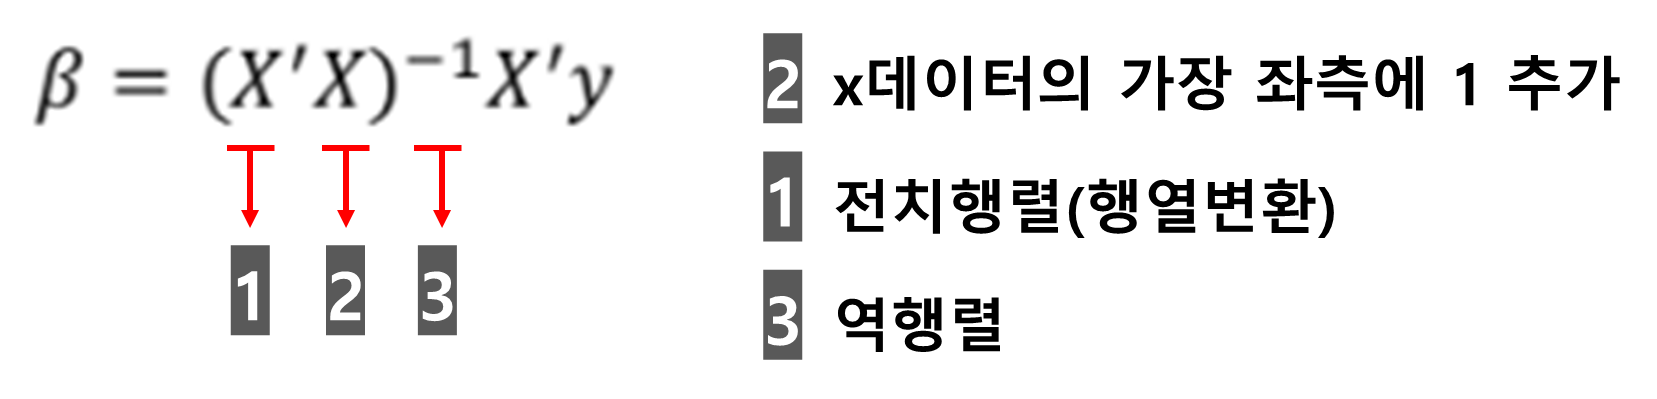

In [8]:
newX=np.c_[np.ones(len(x)),x]
newX

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 1.],
       [1., 1.],
       [1., 3.],
       [1., 1.],
       [1., 3.]])

In [9]:
# 위의수식 newX의전치행렬*newX
계산1=np.dot(newX.T,newX)
계산1

array([[ 8., 15.],
       [15., 35.]])

In [10]:
#계산1의 역행렬
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1)  
계산1역행렬

array([[ 0.63636364, -0.27272727],
       [-0.27272727,  0.14545455]])

In [11]:
# 최종결과
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

array([86.18181818, -0.96363636])

### Part2. [다중선형회귀_최소제곱법계산식]
- 위의 작업2방법으로 계산합니다.

In [12]:
df['공지확인횟수']=[1,2,20,7,8,1,2,3]
df

,손든횟수,성적,공지확인횟수
0,1,90,1
1,2,100,2
2,3,80,20
3,1,100,7
4,1,88,8
5,3,77,1
6,1,55,2
7,3,85,3


In [13]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values


In [14]:
# 사이킷런 모델에서 계산된값
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(x,y)
model.coef_, model.intercept_


(array([-1.17727639,  0.12771958]), 85.87993553585818)

In [15]:
# 직접 계산한 최소제곱법
newX=np.c_[np.ones(len(x)),x]
계산1=np.dot(newX.T,newX)
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1) 
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

# 이값으로 해석하면 손든횟수가 많을수록 성적은 -1배 감소한다.
# 이값으로 해석하면 공지확인횟수가 많을수혹 성적은 0.1배 증가한다.


array([85.87993554, -1.17727639,  0.12771958])

### 함수로 작업해봅니다.

In [29]:
## 함수로 작업해봅니다.

def Linear(x,y):
   
    newX=np.c_[np.ones(len(x)),x]
    계산1=np.dot(newX.T,newX)
    np.random.seed(0)
    계산1역행렬= np.linalg.inv(계산1) 
    계산2=np.dot(계산1역행렬,newX.T)
    계산3=np.dot(계산2,y)
    return 계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2


In [30]:
x=df['손든횟수'].values
y=df['성적'].values
Linear(x,y)

array([86.18181818, -0.96363636])

In [31]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values
Linear(x,y)

array([85.87993554, -1.17727639,  0.12771958])

##### 클래스로 구현



In [32]:
class Linear():
    def __init__(self):
        print('Linear를 실행하였습니다.')
         
    def fit(self,x,y):
        
        newX=np.c_[np.ones(len(x)),x]
        계산1=np.dot(newX.T,newX)
        np.random.seed(0)
        계산1역행렬= np.linalg.inv(계산1) 
        계산2=np.dot(계산1역행렬,newX.T)
        계산3=np.dot(계산2,y)
        return
    
    intercept=계산3[0]
    coef=계산3[1:]

In [33]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values
a=Linear()
a.fit(x,y), a.intercept, a.coef


Linear를 실행하였습니다.


(None, 85.87993553585812, array([-1.17727639,  0.12771958]))

### 값을 추가하여 확인합니다.

In [34]:
df['값추가']=[1,2,1,1,1,2,1,1]
x=df.drop('성적',axis=1)
y=df['성적'].values
Linear.fit(x,y)

TypeError: Linear.fit() missing 1 required positional argument: 'y'

In [ ]:
a=Linear()
a.intercept, a.coef

(85.87993553585811, array([-1.17727639,  0.12771958]))

### prdeict를 직접 계산하여 봅니다.


In [ ]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values
a=Linear()
# predict=a.coef[0]*x[:,0]+a.coef[1]*x[:,1]+a.intercept
predict=np.dot(a.coef, x.T)+a.intercept
predict

Linear를 실행하였습니다.


array([84.83037873, 83.78082192, 84.90249799, 85.59669621, 85.72441579,
       82.47582595, 84.95809831, 82.73126511])

In [ ]:
# 사이킷런 모델에서 계산된값
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(x,y)
model.predict(x)


array([84.83037873, 83.78082192, 84.90249799, 85.59669621, 85.72441579,
       82.47582595, 84.95809831, 82.73126511])

### score를 직접계산합니다.]
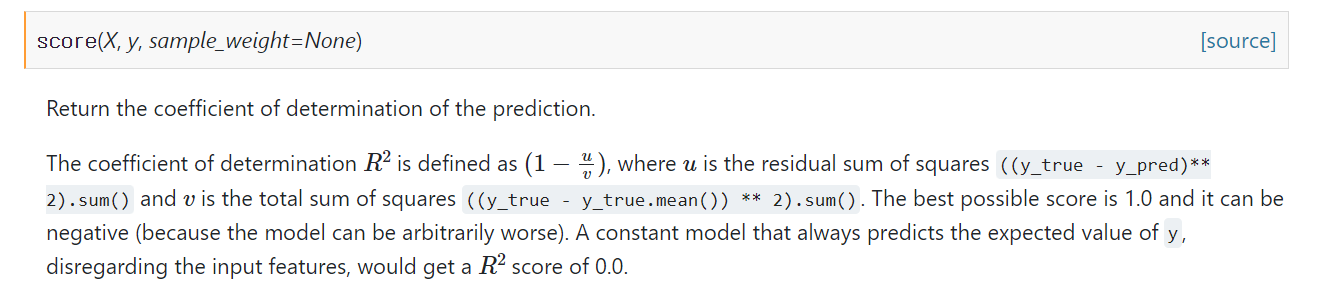

In [ ]:
# 사이킷런 모델에서 계산된값
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(x,y)
model.score(x,y)


0.0073481528952500375

In [ ]:
## 직접계산합니다.
y_pred=model.predict(x)
y_true=y

u=((y_true-y_pred)**2).sum()
v=((y_true-y_true.mean())**2).sum()
score=1-(u/v)
score

0.0073481528952500375

#### 최종함수로 구현하여 봅니다.
- 클래스 매개변수하려면 상속받아 사용해야함

In [35]:
import numpy as np

class Linear():
    global intercept
    global coef
    def __init__(self):
        print('Linear를 실행하였습니다.')
         
    def fit(self,x,y):
        
        
        newX=np.c_[np.ones(len(x)),x]
        계산1=np.dot(newX.T,newX)
        np.random.seed(0)
        계산1역행렬= np.linalg.inv(계산1) 
        계산2=np.dot(계산1역행렬,newX.T)
        계산3=np.dot(계산2,y)
        self.intercept=계산3[0]
        self.coef=계산3[1:]
    
    intercept=계산3[0]
    coef=계산3[1:]
    
    def predict(self,x):
        return np.dot(coef, x.T)+intercept
    
    def score(self,x,y):
        y_true=y
        y_pred=self.predict(x)
        u=((y_true-y_pred)**2).sum()
        v=((y_true-y_true.mean())**2).sum()
        score=1-(u/v)
        return score
        

In [36]:
mo=Linear()
mo.fit(x,y)
mo.predict(x)
mo.score(x,y)

Linear를 실행하였습니다.


ValueError: shapes (2,) and (3,8) not aligned: 2 (dim 0) != 3 (dim 0)

TypeError: function() argument 'code' must be code, not str

In [40]:
class Linear(self,fit_intercept=True):
    global intercept
    global coef
    def __init__(self):
        print('Linear를 실행하였습니다.')
         
    def fit(self,x,y):
        
        if np.ndim(x)<2:
            x=np.reshape(x,(-1,1))
        #newX=np.c_[np.ones(len(x)),x]
        newX=x
        계산1=np.dot(newX.T,newX)
        np.random.seed(0)
        계산1역행렬= np.linalg.inv(계산1) 
        계산2=np.dot(계산1역행렬,newX.T)
        계산3=np.dot(계산2,y)
        self.intercept=계산3[0]
        self.coef=계산3[1:]
    
    intercept=계산3[0]
    coef=계산3[1:]
    
    def predict(self,x):
        return np.dot(coef, x.T)+intercept
    
    def score(self,x,y):
        y_true=y
        y_pred=self.predict(x)
        u=((y_true-y_pred)**2).sum()
        v=((y_true-y_true.mean())**2).sum()
        score=1-(u/v)
        return score
        

NameError: name 'self' is not defined